In [144]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from collections import Counter # counter 함수
from sklearn.preprocessing import MinMaxScaler # 스케일링


from tqdm import tqdm_notebook

import pickle

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [198]:
# 모델링 import
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report # classification report


# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV # 그리드서치


/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
raw_data = pickle.load( open( "challenge2", "rb" ) ) 
raw_data

CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
0             1       0             1             0               0   
1             2       0             1             0               0   
2             3       0             0             1               3   
3             4       1             0             2               4   
4             5       0             4             0               0   
5             6       0             1             0               1   
6             7       0             0             1               2   
7             8       0             1             0               0   
8             9       0             2             0               0   
9            10       0             0             1               1   
10           11       1             0             3               5   
11           12       0             0             1               2   
12           13       0             1             0               0   
13           14       0             2             0               0   
14           15       0             3             1               1   
15           16       0             1             0               1   
16           17       0             1             0               3   
17           18       0             1             0               0   
18           19       0             1             0               0   
19           20       0             2             0               1   
20           21       0             0             0               1   
21           22       0             0             0               1   
22           23       0             0             0               1   
23           24       0             0             1               2   
24           25       0             1             0               0   
25           26       0             1             0               0   
26           27       0             0             0               1   
27           28       0             1             0               0   
28           29       0             3             0               0   
29           30       0             0             0               1   
30           31       0             1             0               0   
31           32       0             4             0               2   
32           33       0             0             0               1   
33           34       0             0             0               1   
34           35       0             1             0               0   
35           36       0             1             0               0   
36           37       1             0             1               2   
37           38       0             2             0               0   
38           39       0             0             1               2   
39           40       0             1             1               1   
40           41       0             0             0               1   
41           42       0             0             2               2   
42           43       0             0             1               2   
43           44       0             1             0               0   
44           45       0             1             1               3   
45           46       0             0             1               1   
46           47       1             0             1               2   
47           48       0             1             4               4   
48           49       0             0             0               2   
49           50       0             2             0               1   
50           51       0             1             0               1   
51           52       0             1             2               2   
52           53       0             1             0               1   
53           54       0             1             0               1   
54           55       0             0             2               2   
55           56       0         

In [5]:
# 전체 데이터, 상환, 부실 데이터 개수 및 비율 확인 함수

def check_prop ( checking_data):
    label_1 = len(checking_data.loc[checking_data['TARGET'] == 1])
    label_0 = len(checking_data.loc[checking_data['TARGET'] == 0])
    label_prop = label_1 / (label_1 + label_0)

    print (" 1) 전체 데이터 개수 : {} \n 2) 상환 개수 : {} \n 3) 부실 개수: {} \n 4) 부실데이터 비율: {:.2f} ".\
           format( label_1+label_0, label_0, label_1, label_prop))


In [6]:
check_prop(raw_data)

 1) 전체 데이터 개수 : 100233 
 2) 상환 개수 : 95946 
 3) 부실 개수: 4287 
 4) 부실데이터 비율: 0.04 


In [7]:
# CUST_ID 삭제 (index와 값이 같음), X와 y 나눔
X = raw_data.drop(['CUST_ID', 'TARGET'], axis=1)
y = raw_data['TARGET']



# SMOTE적용 전 스케일링
* minmaxscaler

In [8]:


scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


# borderSMOTE 적용
* borderline1


In [9]:
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X_scaled,y)



In [10]:
y_resampled = pd.DataFrame(y_resampled).rename(columns={0:'TARGET'})
# y값의 변수 이름 변환

X_resampled = pd.DataFrame(X_resampled)

temp = pd.concat([y_resampled, X_resampled], axis=1) 
# 비율을 확인하기 위해 잠시 합함

In [11]:
check_prop(temp)

 1) 전체 데이터 개수 : 191892 
 2) 상환 개수 : 95946 
 3) 부실 개수: 95946 
 4) 부실데이터 비율: 0.50 


In [135]:
X_resampled.columns = X.columns

# 군집분석


### k-means

print ("클러스터 레이블: \n {}". format(kmeans.labels_))

### 평가방법: Elbow method


In [12]:


elbow_scores = [] # 엘보우 점수

iterations = range(1, 30)

for i in tqdm_notebook(iterations): # 클러스터를 1~10 까지 대입해보며 점수 저장
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_resampled)
    #cluster_labels = kmeans.fit_predict(X_resampled)
    
    es = kmeans.score(X_resampled)
    elbow_scores.append(es)
    
    #ss = silhouette_score(X_resampled, cluster_labels)
    #silhouette_scores.append(ss)
    
    

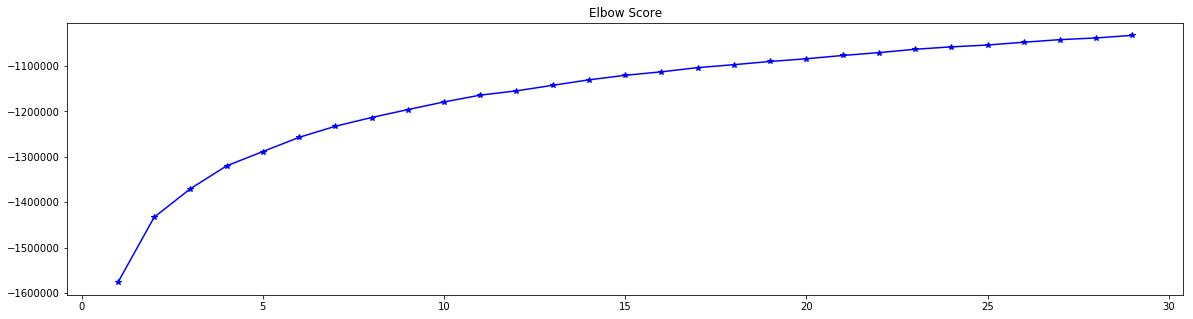

In [14]:

%matplotlib inline

plt.figure(figsize = (20, 5))
plt.plot(iterations, elbow_scores, 'b*-')
plt.title ('Elbow Score')

* 중복된 변수를 제거 하지 않아서인지 급격히 감소하는 지점이 없어 보인다
* 일단 4개로 해 보자

### cluster : 4개

In [15]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_resampled)
print ("클러스터 레이블: \n {}". format(kmeans.labels_))

클러스터 레이블: 
 [2 2 3 ..., 0 2 3]


In [49]:
prediction = kmeans.predict(X_resampled)
prediction = pd.DataFrame(prediction)
prediction.rename(columns={0:'CLUSTER'}, inplace=True)


In [50]:
X_resampled_cluster = X_resampled.values
print ("데이터 타입은 : {}".format(X_resampled_cluster.dtype))
print (X_resampled_cluster)
    

데이터 타입은 : float64
[[ 0.2         0.          0.         ...,  0.          0.1         0.        ]
 [ 0.2         0.          0.         ...,  0.          0.1         0.        ]
 [ 0.          0.2         0.42857143 ...,  0.          0.1         0.        ]
 ..., 
 [ 0.2         0.04710143  0.03364388 ...,  0.          0.17644929  0.        ]
 [ 0.          0.27493702  0.19638358 ...,  0.          0.07493702
   0.11240552]
 [ 0.          0.09419707  0.27742438 ...,  0.          0.1         0.        ]]


In [52]:
pd.DataFrame(X_resampled_cluster).head()

0    1         2         3         4         5         6        7    \
0  0.2  0.0  0.000000  0.000000  0.009054  0.009055  0.009535  0.00000   
1  0.2  0.0  0.000000  0.000000  0.024145  0.000000  0.025425  0.00000   
2  0.0  0.2  0.428571  0.333333  0.015091  0.009055  0.000000  0.00997   
3  0.0  0.4  0.571429  0.333333  0.006036  0.003019  0.000000  0.00997   
4  0.8  0.0  0.000000  0.000000  0.021127  0.015092  0.022247  0.00000   

        8         9         10        11   12        13    14     15   \
0  0.008264  0.000000  0.181818  0.107438  0.3  0.428572  0.54  0.385   
1  0.000000  0.000000  0.181818  1.000000  0.0  0.000000  0.55  0.405   
2  0.008264  0.206612  0.363636  1.000000  0.0  0.000000  0.00  0.245   
3  0.008264  0.206612  0.363636  0.504132  0.0  0.000000  0.00  0.505   
4  0.008264  0.000000  0.090909  0.801653  0.0  0.000000  0.48  0.240   

        16    17   18   19   20   21   22   23   24   25    26        27   \
0  0.428571  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.12  0.222222   
1  0.428571  0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.13  0.000000   
2  0.428571  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.02  0.000000   
3  0.142857  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.04  0.000000   
4  0.428571  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  0.000000   

    28        29   30   31      32   33      34   35     36     37     38   \
0  0.00  0.000000  0.0  0.0  0.0475  0.0  0.0475  0.0  0.019  0.020  0.020   
1  0.00  0.000000  0.0  0.0  0.0000  0.0  0.0275  0.0  0.000  0.007  0.036   
2  0.00  0.000000  0.0  0.0  0.0000  0.0  0.0000  0.0  0.010  0.011  0.011   
3  0.00  0.000000  0.0  0.0  0.0000  0.0  0.0000  0.0  0.000  0.004  0.004   
4  0.95  0.019802  0.0  0.0  0.0000  0.0  0.0000  0.0  0.030  0.004  0.004   

   39   40        41        42        43        44   45   46      47   \
0  0.0  0.0  0.163934  0.000000  0.000000  0.000000  0.6  0.0  0.0450   
1  0.0  0.0  0.000000  0.001000  0.011696  0.227273  0.6  0.0  0.0081   
2  0.0  0.0  0.000000  0.000000  0.000000  0.090909  0.8  1.0  0.0139   
3  0.0  0.0  0.000000  0.000000  0.000000  0.045455  0.3  0.0  0.1118   
4  0.0  0.0  0.000000  0.001666  0.011696  0.045455  0.5  0.0  0.0396   

        48        49        50        51   52        53   54       55   \
0  0.259474  0.060002  0.084211  0.666667  0.0  0.000000  0.0  0.00000   
1  0.011579  0.060002  0.042105  0.416667  0.0  0.000000  0.0  0.00000   
2  0.008947  0.060002  0.042105  0.416667  0.0  0.000000  0.0  0.00000   
3  0.000000  0.060002  0.084211  0.750000  0.0  0.450000  0.0  0.39375   
4  0.186316  0.100002  0.084211  0.666667  0.0  0.108333  0.0  0.05625   

        56   57        58        59        60        61        62        63   \
0  0.527273  0.0  0.233333  0.659311  0.772923  0.774854  0.000000  0.959074   
1  0.081818  0.0  0.077778  0.730337  0.000000  0.822312  0.000000  0.000000   
2  0.109091  0.0  0.255556  0.696301  0.772923  0.000000  0.763958  0.000000   
3  0.290909  0.0  0.066667  0.629952  0.719905  0.000000  0.763958  0.000000   
4  0.372727  0.0  0.144444  0.720667  0.797578  0.815851  0.000000  0.000000   

        64        65   66        67        68        69        70   71   \
0  0.966549  0.950062  0.0  0.785607  0.953990  0.000000  0.799562  0.0   
1  0.967545  0.952711  0.0  0.785607  0.820050  0.000000  0.000000  0.0   
2  0.000000  0.926415  0.0  0.785607  0.840731  0.000000  0.000000  0.0   
3  0.000000  0.964256  0.0  0.785607  0.911239  0.000000  0.000000  0.0   
4  0.960155  0.925336  0.0  0.824532  0.929055  0.787204  0.000000  0.0   

        72   73        74        75        76        77        78        79   \
0  0.799562  0.0  0.754108  0.811226  0.811226  0.820228  0.000000  0.000000   
1  0.763610  0.0  0.000000  0.760566  0.839589  0.769870  0.000000  0.000000   
2  0.000000  0.0  0.714286  0.782377  0.782377  0.769870  0.000000  0.000000   
3  0.000000  0.0  0.000000  0.733562  0.733562  0.8

In [74]:
cluster_4 = pd.concat([prediction, pd.DataFrame(X_resampled_cluster)], axis=1)

In [76]:
cluster_4

CLUSTER         0         1         2         3         4  \
0             2  0.200000  0.000000  0.000000  0.000000  0.009054   
1             2  0.200000  0.000000  0.000000  0.000000  0.024145   
2             3  0.000000  0.200000  0.428571  0.333333  0.015091   
3             0  0.000000  0.400000  0.571429  0.333333  0.006036   
4             2  0.800000  0.000000  0.000000  0.000000  0.021127   
5             2  0.200000  0.000000  0.142857  0.166667  0.141851   
6             3  0.000000  0.200000  0.285714  0.166667  0.012072   
7             2  0.200000  0.000000  0.000000  0.000000  0.003018   
8             3  0.400000  0.000000  0.000000  0.000000  0.274648   
9             2  0.000000  0.200000  0.142857  0.000000  0.009054   
10            3  0.000000  0.600000  0.714286  0.333333  0.027163   
11            2  0.000000  0.200000  0.285714  0.166667  0.009054   
12            1  0.200000  0.000000  0.000000  0.000000  0.012072   
13            0  0.400000  0.000000  0.000000  0.000000  0.202213   
14            1  0.600000  0.200000  0.142857  0.000000  0.015091   
15            2  0.200000  0.000000  0.142857  0.166667  0.341046   
16            3  0.200000  0.000000  0.428571  0.500000  0.039235   
17            1  0.200000  0.000000  0.000000  0.000000  0.274648   
18            3  0.200000  0.000000  0.000000  0.000000  0.018109   
19            3  0.400000  0.000000  0.142857  0.166667  0.175050   
20            0  0.000000  0.000000  0.142857  0.166667  0.165996   
21            1  0.000000  0.000000  0.142857  0.166667  0.108652   
22            2  0.000000  0.000000  0.142857  0.166667  0.181087   
23            0  0.000000  0.200000  0.285714  0.166667  0.051308   
24            2  0.200000  0.000000  0.000000  0.000000  0.193159   
25            1  0.200000  0.000000  0.000000  0.000000  0.027163   
26            3  0.000000  0.000000  0.142857  0.166667  0.006036   
27            2  0.200000  0.000000  0.000000  0.000000  0.039235   
28            1  0.600000  0.000000  0.000000  0.000000  0.316901   
29            0  0.000000  0.000000  0.142857  0.166667  0.003018   
30            3  0.200000  0.000000  0.000000  0.000000  0.009054   
31            2  0.800000  0.000000  0.285714  0.500000  0.413481   
32            2  0.000000  0.000000  0.142857  0.166667  0.093561   
33            3  0.000000  0.000000  0.142857  0.166667  0.006036   
34            2  0.200000  0.000000  0.000000  0.000000  0.199195   
35            1  0.200000  0.000000  0.000000  0.000000  0.054326   
36            0  0.000000  0.200000  0.285714  0.166667  0.003018   
37            2  0.400000  0.000000  0.000000  0.000000  0.069416   
38            3  0.000000  0.200000  0.285714  0.166667  0.247485   
39            3  0.200000  0.200000  0.142857  0.000000  0.096579   
40            0  0.000000  0.000000  0.142857  0.166667  0.087525   
41            3  0.000000  0.400000  0.285714  0.000000  0.018109   
42            2  0.000000  0.200000  0.285714  0.166667  0.012072   
43            1  0.200000  0.000000  0.000000  0.000000  0.003018   
44            2  0.200000  0.200000  0.428571  0.333333  0.006036   
45            0  0.000000  0.200000  0.142857  0.000000  0.036217   
46            1  0.000000  0.200000  0.285714  0.166667  0.003018   
47            1  0.200000  0.800000  0.571429  0.000000  0.030181   
48            3  0.000000  0.000000  0.285714  0.333333  0.024145   
49            1  0.400000  0.000000  0.142857  0.166667  1.000000   
50            1  0.200000  0.000000  0.142857  0.166667  0.084507   
51            2  0.200000  0.400000  0.285714  0.000000  0.301811   
52            0  0.200000  0.000000  0.142857  0.166667  0.265594   
53            0  0.200000  0.000000  0.142857  0.166667  0.003018   
54            3  0.000000  0.400000  0.285714  0.000000  0.009054   
55            3  0.200000  0.400000  0.285714  0.000000  0.018109   
56            2  0.200000  0.000000  0.000000  0.000000  0.051308   
57    

### 각 클러스터 별로 데이터의 비율 확인

In [77]:
cluster_4 = pd.concat([y_resampled, cluster_4],axis=1)
cluster_4

TARGET  CLUSTER         0         1         2         3         4  \
0            0        2  0.200000  0.000000  0.000000  0.000000  0.009054   
1            0        2  0.200000  0.000000  0.000000  0.000000  0.024145   
2            0        3  0.000000  0.200000  0.428571  0.333333  0.015091   
3            1        0  0.000000  0.400000  0.571429  0.333333  0.006036   
4            0        2  0.800000  0.000000  0.000000  0.000000  0.021127   
5            0        2  0.200000  0.000000  0.142857  0.166667  0.141851   
6            0        3  0.000000  0.200000  0.285714  0.166667  0.012072   
7            0        2  0.200000  0.000000  0.000000  0.000000  0.003018   
8            0        3  0.400000  0.000000  0.000000  0.000000  0.274648   
9            0        2  0.000000  0.200000  0.142857  0.000000  0.009054   
10           1        3  0.000000  0.600000  0.714286  0.333333  0.027163   
11           0        2  0.000000  0.200000  0.285714  0.166667  0.009054   
12           0        1  0.200000  0.000000  0.000000  0.000000  0.012072   
13           0        0  0.400000  0.000000  0.000000  0.000000  0.202213   
14           0        1  0.600000  0.200000  0.142857  0.000000  0.015091   
15           0        2  0.200000  0.000000  0.142857  0.166667  0.341046   
16           0        3  0.200000  0.000000  0.428571  0.500000  0.039235   
17           0        1  0.200000  0.000000  0.000000  0.000000  0.274648   
18           0        3  0.200000  0.000000  0.000000  0.000000  0.018109   
19           0        3  0.400000  0.000000  0.142857  0.166667  0.175050   
20           0        0  0.000000  0.000000  0.142857  0.166667  0.165996   
21           0        1  0.000000  0.000000  0.142857  0.166667  0.108652   
22           0        2  0.000000  0.000000  0.142857  0.166667  0.181087   
23           0        0  0.000000  0.200000  0.285714  0.166667  0.051308   
24           0        2  0.200000  0.000000  0.000000  0.000000  0.193159   
25           0        1  0.200000  0.000000  0.000000  0.000000  0.027163   
26           0        3  0.000000  0.000000  0.142857  0.166667  0.006036   
27           0        2  0.200000  0.000000  0.000000  0.000000  0.039235   
28           0        1  0.600000  0.000000  0.000000  0.000000  0.316901   
29           0        0  0.000000  0.000000  0.142857  0.166667  0.003018   
30           0        3  0.200000  0.000000  0.000000  0.000000  0.009054   
31           0        2  0.800000  0.000000  0.285714  0.500000  0.413481   
32           0        2  0.000000  0.000000  0.142857  0.166667  0.093561   
33           0        3  0.000000  0.000000  0.142857  0.166667  0.006036   
34           0        2  0.200000  0.000000  0.000000  0.000000  0.199195   
35           0        1  0.200000  0.000000  0.000000  0.000000  0.054326   
36           1        0  0.000000  0.200000  0.285714  0.166667  0.003018   
37           0        2  0.400000  0.000000  0.000000  0.000000  0.069416   
38           0        3  0.000000  0.200000  0.285714  0.166667  0.247485   
39           0        3  0.200000  0.200000  0.142857  0.000000  0.096579   
40           0        0  0.000000  0.000000  0.142857  0.166667  0.087525   
41           0        3  0.000000  0.400000  0.285714  0.000000  0.018109   
42           0        2  0.000000  0.200000  0.285714  0.166667  0.012072   
43           0        1  0.200000  0.000000  0.000000  0.000000  0.003018   
44           0        2  0.200000  0.200000  0.428571  0.333333  0.006036   
45           0        0  0.000000  0.200000  0.142857  0.000000  0.036217   
46           1        1  0.000000  0.200000  0.285714  0.166667  0.003018   
47           0        1  0.200000  0.800000  0.571429  0.000000  0.030181   
48           0        3  0.000000  0.000000  0.285714  0.333333  0.024145   
49           0        1  0.400000  0.000000  0.142857  0.166667  1.000000   
50           0        1  0.200000  0.000000  0.142857  0.166667  0.084507   
51  

In [82]:
# 클러스터값이 같은 데이터끼리 하나로 묶음

columns_val_name = ["cluster_4_{}".format (i) for i in range(0, 5) ]
columns_list = []

for i in range(0, 5):
    columns_list.append(pd.DataFrame(cluster_4.loc[cluster_4.CLUSTER == i]))

In [89]:
# 각 클러스터 별로 데이터의 비율을 확인

for i in range(0,4):
    print (columns_val_name[i])
    check_prop(pd.DataFrame(columns_list[i]))



cluster_4_0
 1) 전체 데이터 개수 : 45559 
 2) 상환 개수 : 20102 
 3) 부실 개수: 25457 
 4) 부실데이터 비율: 0.56 
cluster_4_1
 1) 전체 데이터 개수 : 55944 
 2) 상환 개수 : 25046 
 3) 부실 개수: 30898 
 4) 부실데이터 비율: 0.55 
cluster_4_2
 1) 전체 데이터 개수 : 40450 
 2) 상환 개수 : 23526 
 3) 부실 개수: 16924 
 4) 부실데이터 비율: 0.42 
cluster_4_3
 1) 전체 데이터 개수 : 49939 
 2) 상환 개수 : 27272 
 3) 부실 개수: 22667 
 4) 부실데이터 비율: 0.45 


# 모델 적용

## Random Forest

In [157]:


X_0 = columns_list[2].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_0 = columns_list[2]['TARGET']

#X_0 = X_resampled # 클러스터 전
#y_0 = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, random_state=42)
forest = RandomForestClassifier (n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [138]:
y_pred = forest.predict(X_test)

In [139]:
print ("훈련세트 정확도: {:.3f}". format(forest.score(X_train, y_train)))
print ("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련세트 정확도: 0.997
테스트 세트 정확도: 0.974


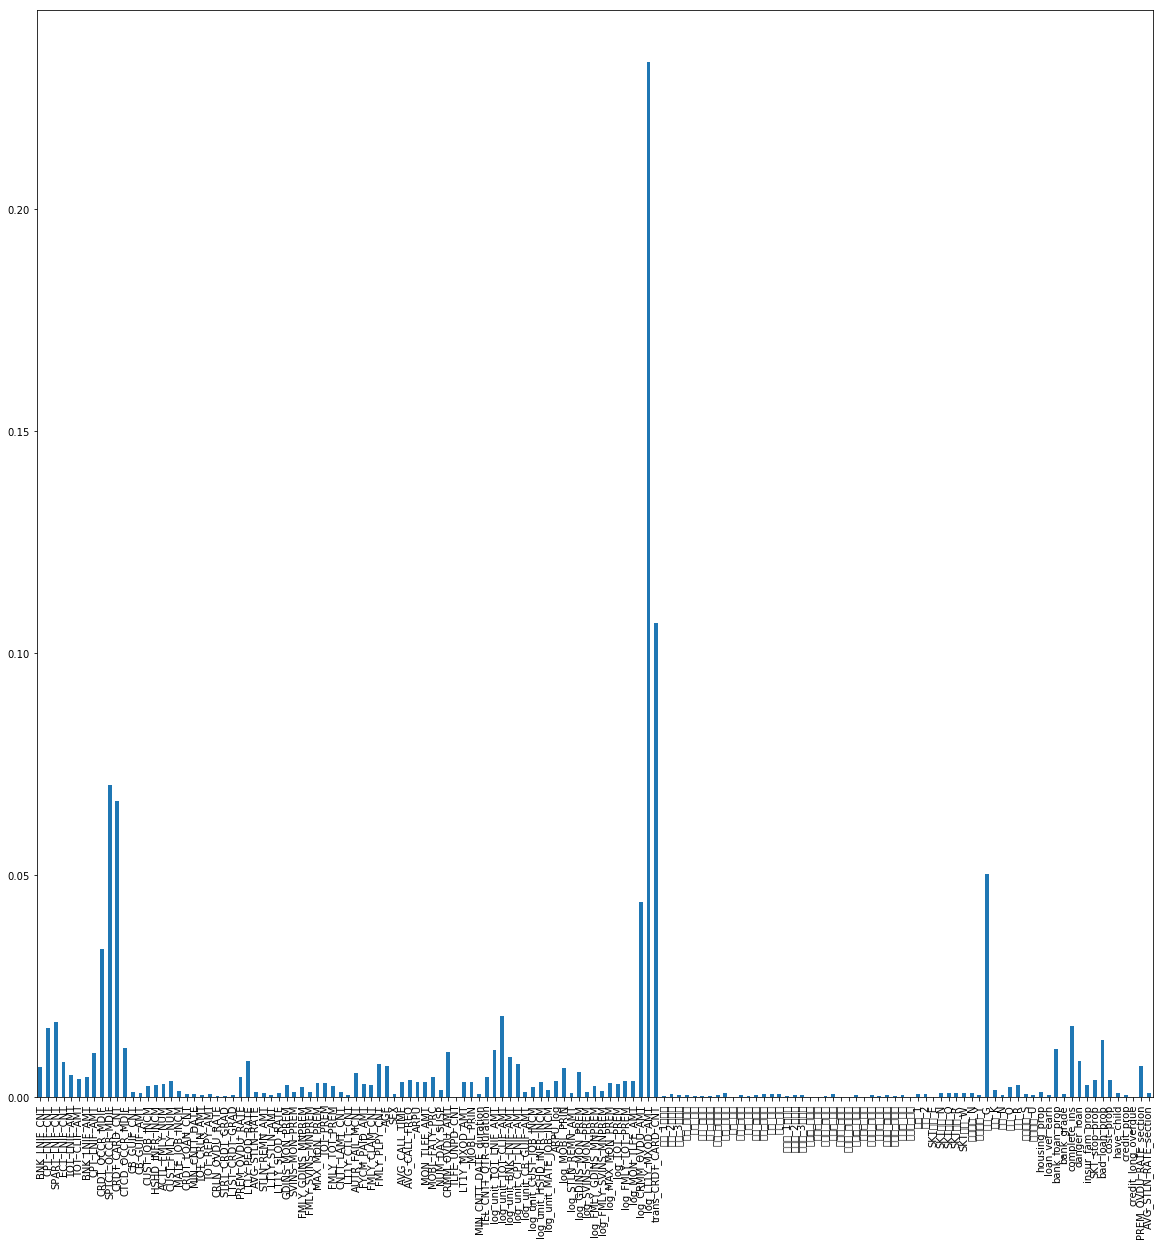

In [140]:
# 중요한 변수
importances = forest.feature_importances_
plt.figure(figsize=(20,20))
pd.Series(importances, index=X_train.columns).plot(kind='bar')

In [131]:
# f1 score



f1_score(y_test, y_pred)

0.97367377189502902

In [132]:
# classification report



#target_names = ['benign', 'malignannt']
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97     24074
          1       0.97      0.98      0.97     23899

avg / total       0.97      0.97      0.97     47973



# 크로스 밸리데이션을 해 보자

In [133]:

kfold = KFold(n_splits=5, shuffle = True, random_state=0)
score = cross_val_score(forest, X_0, y_0, cv=kfold, scoring = 'f1')

/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sherryjeon/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:

In [134]:
score

array([ 0.97468124,  0.97500322,  0.97347432,  0.97376093,  0.97287532])

TARGET
0            0
1            0
2            0
3            1
4            0
5            0
6            0
7            0
8            0
9            0
10           1
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           1
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           1
47           0
48           0
49           0
50           0
51           0
52           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65           0
66           0
67           0
68           0
69           0
70           0
71           0
72           0
73           0
74           0
75           1
76           0
77           0
78           0
79           0
80           0
81           0
82           0
83           0
84           0
85           0
86           0
87           0
88           0
89           0
90           0
91           0
92           0
93           0
94           0
95           0
96           1
97           0
98           1
99           0
...        ...
191792       1
191793       1
191794       1
191795       1
191796       1
191797       1
191798       1
191799       1
191800       1
191801       1
191802       1
191803       1
191804       1
191805       1
191806       1
191807       1
191808       1
191809       1
191810       1
191811       1
191812       1
191813       1
191814       1
191815       1
191816       1
191817       1
191818       1
191819       1
191820       1
191821       1
191822       1
191823       1
191824       1
191825       1
191826       1
191827       1
191828       1
191829       1
191830       1
191831       1
191832       1
191833       1
191834       1
191835       1
191836       1
191837       1
191838       1
191839       1
191840       1
191841       1
191842       1
191843       1
191844       1
191845       1
191846       1
191847       1
191848       1
191849       1
191850       1
191851       1
191852       1
191853       1
191854       1
191855       1
191856       1
191857       1
191858       1
191859       1
191860       1
191861       1
191862       1
191863       1
191864       1
191865       1
191866       1
191867       1
191868       1
191869       1
191870       1
191871       1
191872       1
191873       1
191874       1
191875       1
191876       1
191877       1
191878       1
191879       1
191880       1
191881       1
191882       1
191883       1
191884       1
191885       1
191886       1
191887       1
191888       1
191889       1
191890       1
191891       1

[191892 rows x 1 columns]

## 그리드 서치를 이용한 모델 적용 함수

* Random Forest 적용함수


In [164]:
def random_forest(X, y,hyper_dict):
    grid_search = GridSearchCV(RandomForestClassifier(),\
                               hyper_dict, cv=3, scoring='f1') # 모델 적용
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    grid_search.fit(X_train, y_train)
    
    return grid_search, X_val, y_val
    #test_score("Random Forest", grid_search, X_val, y_val)
    
    
    

* XGBoost

In [195]:
def xgboost(X, y, hyper_dict):
    grid_search = GridSearchCV(XGBClassifier(),\
                               hyper_dict, cv=3, scoring='f1')
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    grid_search.fit(X_train, y_train)
    
    return grid_search, X_val, y_val

* Light GBM

In [ ]:
def lightgbm(X, y, hyper_dict):
    grid_search = GridSearchCV(LGBMClassifier(),\
                               hyper_dict, cv=3, scoring='f1')
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    grid_search.fit(X_train, y_train)
    
    return grid_search, X_val, y_val

* score 함수


In [184]:
def test_score (model_name, model_object, X_test, y_test):
    y_pred = model_object.predict(X_test)
    model_object.score(X_test, y_test)
    
    print ("모델 : {}". format(model_name))
    print ("최적 매개변수 : {}". format(model_object.best_params_))
    print ("교차검증 결과 분석")
    print (pd.DataFrame(model_object.cv_results_).head())
    print ()
    #print ("점수 : {:.3f}".format(model_object.scorer_))
    print ("최상 교차 점수 : {:.3f}". format(model_object.best_score_))
    print ("분류 리포트 \n")
    print(classification_report(y_test, y_pred))

# 모델 적용

In [187]:
X_0 = columns_list[0].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_0 = columns_list[0]['TARGET']
X_1 = columns_list[1].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_1 = columns_list[1]['TARGET']
X_2 = columns_list[2].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_2 = columns_list[2]['TARGET']
X_3 = columns_list[3].drop(['TARGET', 'CLUSTER'], axis=1) # 첫번째 클러스터의 X, y 를 나눔
y_3 = columns_list[3]['TARGET']

### Random Forest

In [188]:
param_grid = {'n_estimators':[10, 50, 100,500],\
              'max_features': ['sqrt', 'log2'],\
             'n_jobs': [-1]}


In [189]:
# cluster 0
%time 

grid_search_random0, X_val, y_val = random_forest(X_0, y_0,\
                                                 param_grid)
test_score("Random Forest",grid_search_random0, X_val, y_val)

모델 : Random Forest
최적 매개변수 : {'max_features': 'log2', 'n_estimators': 500, 'n_jobs': -1}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.506049         0.111004         0.981485          0.999003   
1       2.209027         0.110508         0.983291          0.999967   
2       4.322381         0.108759         0.983484          1.000000   
3      19.804094         0.313517         0.983982          1.000000   
4       0.301569         0.111497         0.980461          0.999075   

  param_max_features param_n_estimators param_n_jobs  \
0               sqrt                 10           -1   
1               sqrt                 50           -1   
2               sqrt                100           -1   
3               sqrt                500           -1   
4               log2                 10           -1   

                                              params  rank_test_score  \
0  {'max_features': 'sqrt', 'n_estimators': 10, '...     

In [190]:
# cluster 1
%time 
grid_search_random1, X_val, y_val = random_forest(X_1, y_1,\
                                                 param_grid)
test_score("Random Forest",grid_search_random1, X_val, y_val)

모델 : Random Forest
최적 매개변수 : {'max_features': 'log2', 'n_estimators': 500, 'n_jobs': -1}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.087712         0.120426         0.976430          0.998598   
1       3.193628         0.111136         0.980520          0.999962   
2       5.283156         0.111826         0.980921          0.999995   
3      22.657191         0.357515         0.981448          1.000000   
4       0.416494         0.112296         0.976977          0.998929   

  param_max_features param_n_estimators param_n_jobs  \
0               sqrt                 10           -1   
1               sqrt                 50           -1   
2               sqrt                100           -1   
3               sqrt                500           -1   
4               log2                 10           -1   

                                              params  rank_test_score  \
0  {'max_features': 'sqrt', 'n_estimators': 10, '...     

In [191]:
# cluster 2
%time 
grid_search_random2, X_val, y_val = random_forest(X_2, y_2,\
                                                 param_grid)
test_score("Random Forest",grid_search_random2, X_val, y_val)

모델 : Random Forest
최적 매개변수 : {'max_features': 'sqrt', 'n_estimators': 500, 'n_jobs': -1}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.462660         0.111148         0.975218          0.998232   
1       1.918545         0.110825         0.977946          0.999941   
2       3.307702         0.109935         0.978816          1.000000   
3      17.166858         0.293728         0.979304          1.000000   
4       0.257231         0.109360         0.973651          0.998667   

  param_max_features param_n_estimators param_n_jobs  \
0               sqrt                 10           -1   
1               sqrt                 50           -1   
2               sqrt                100           -1   
3               sqrt                500           -1   
4               log2                 10           -1   

                                              params  rank_test_score  \
0  {'max_features': 'sqrt', 'n_estimators': 10, '...     

In [192]:
# cluster 3
%time 
grid_search_random3, X_val, y_val = random_forest(X_3, y_3,\
                                                 param_grid)
test_score("Random Forest",grid_search_random3, X_val, y_val)

모델 : Random Forest
최적 매개변수 : {'max_features': 'log2', 'n_estimators': 500, 'n_jobs': -1}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.636256         0.111862         0.973310          0.998464   
1       2.485933         0.113047         0.978965          0.999949   
2       4.323734         0.110785         0.978716          1.000000   
3      22.153920         0.354194         0.979227          1.000000   
4       0.390463         0.110688         0.974295          0.998405   

  param_max_features param_n_estimators param_n_jobs  \
0               sqrt                 10           -1   
1               sqrt                 50           -1   
2               sqrt                100           -1   
3               sqrt                500           -1   
4               log2                 10           -1   

                                              params  rank_test_score  \
0  {'max_features': 'sqrt', 'n_estimators': 10, '...     

### XG Boost

In [196]:
param_grid = {'n_estimators':[100, 300, 500],\
              'learning_rate' : [0.1, 0.05, 0.01]}

In [199]:
# cluster0         
%time 
grid_search_xgboost0, X_val, y_val = xgboost(X_0, y_0,\
                                                   param_grid )
test_score("XGBoost", grid_search_xgboost0, X_val, y_val)

모델 : XGBoost
최적 매개변수 : {'learning_rate': 0.1, 'n_estimators': 500}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       7.068148         0.070479         0.977746          0.980600   
1      19.595204         0.114513         0.981983          0.989614   
2      32.563761         0.172261         0.982392          0.993504   
3       6.750195         0.059810         0.967407          0.968907   
4      20.016728         0.124402         0.980236          0.984356   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                300   
2                 0.1                500   
3                0.05                100   
4                0.05                300   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                5   
1   {'learning_rate': 0.1, 'n_estimators': 300}                2   
2   {'learning_rate'

In [200]:
# cluster1  
%time 
grid_search_xgboost1, X_val, y_val = xgboost(X_1, y_1,\
                                                   param_grid )
test_score("XGBoost", grid_search_xgboost1, X_val, y_val)

모델 : XGBoost
최적 매개변수 : {'learning_rate': 0.1, 'n_estimators': 500}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       8.243788         0.073633         0.972934          0.975281   
1      25.759660         0.142911         0.980176          0.984864   
2      41.830785         0.223942         0.980452          0.988540   
3       9.273841         0.081429         0.956944          0.958305   
4      28.886539         0.292137         0.977820          0.980771   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                300   
2                 0.1                500   
3                0.05                100   
4                0.05                300   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                5   
1   {'learning_rate': 0.1, 'n_estimators': 300}                2   
2   {'learning_rate'

In [201]:
# cluster2  
%time 

grid_search_xgboost2, X_val, y_val = xgboost(X_2, y_2,\
                                                   param_grid )
test_score("XGBoost", grid_search_xgboost2, X_val, y_val)

모델 : XGBoost
최적 매개변수 : {'learning_rate': 0.1, 'n_estimators': 300}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       6.040827         0.058088         0.971575          0.975611   
1      20.722800         0.131289         0.976748          0.986813   
2      29.339740         0.158531         0.976591          0.993076   
3       5.932122         0.056223         0.958870          0.961522   
4      18.470950         0.111483         0.974326          0.980020   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                300   
2                 0.1                500   
3                0.05                100   
4                0.05                300   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                5   
1   {'learning_rate': 0.1, 'n_estimators': 300}                1   
2   {'learning_rate'

In [202]:
# cluster3         
%time 
grid_search_xgboost3, X_val, y_val = xgboost(X_3, y_3,\
                                                   param_grid )
test_score("XGBoost", grid_search_xgboost3, X_val, y_val)

모델 : XGBoost
최적 매개변수 : {'learning_rate': 0.1, 'n_estimators': 300}
교차검증 결과 분석
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       8.055138         0.070279         0.969553          0.971856   
1      29.425468         0.203619         0.975380          0.982195   
2      44.861425         0.220052         0.975053          0.986853   
3       8.410690         0.077983         0.950260          0.952079   
4      25.246850         0.150421         0.973562          0.976953   

  param_learning_rate param_n_estimators  \
0                 0.1                100   
1                 0.1                300   
2                 0.1                500   
3                0.05                100   
4                0.05                300   

                                         params  rank_test_score  \
0   {'learning_rate': 0.1, 'n_estimators': 100}                5   
1   {'learning_rate': 0.1, 'n_estimators': 300}                1   
2   {'learning_rate'

In [203]:
# Xgboost는 그리드 서치를 적용하지 않고 다시 해 봐야 할 것 같다